In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


# Plot isin piecharts

In [4]:
import pandas as pd

df_mcs_uniq_dup_mean = pd.read_csv('data/round1/wet-lab/mcs_uniq_join_duplicated.csv')

In [5]:
df_total_counts = df_mcs_uniq_dup_mean[['is_in_x', 'library']].groupby(by='library').count().reset_index().rename(columns={'is_in_x': 'total'})
df_in_library_counts = df_mcs_uniq_dup_mean[['is_in_x', 'library']].groupby(by='library').sum().reset_index().rename(columns={'is_in_x': 'in_library'})

df_total_counts = df_total_counts.merge(df_in_library_counts, on='library', how='left')
df_total_counts

,library,total,in_library
0,MC1,518,360
1,MC2_S3N,356,319
2,MC2_S3T,525,421
3,MC3,522,427
4,MC4,475,324


In [6]:
df_total_counts['in_lib_ratio'] = df_total_counts['in_library'] / df_total_counts['total']
df_total_counts["out_lib_ratio"] = 1 - df_total_counts['in_lib_ratio']
lib_name_map = dict(zip(['MC1', 'MC2_S3N', 'MC2_S3T', 'MC3', 'MC4'], ['R1-L1', 'R1-L5', 'R1-L2', 'R1-L3', 'R1-L4']))
df_total_counts['lib_name'] = df_total_counts['library'].map(lib_name_map)
df_total_counts

,library,total,in_library,in_lib_ratio,out_lib_ratio,lib_name
0,MC1,518,360,0.694981,0.305019,R1-L1
1,MC2_S3N,356,319,0.896067,0.103933,R1-L5
2,MC2_S3T,525,421,0.801905,0.198095,R1-L2
3,MC3,522,427,0.818008,0.181992,R1-L3
4,MC4,475,324,0.682105,0.317895,R1-L4


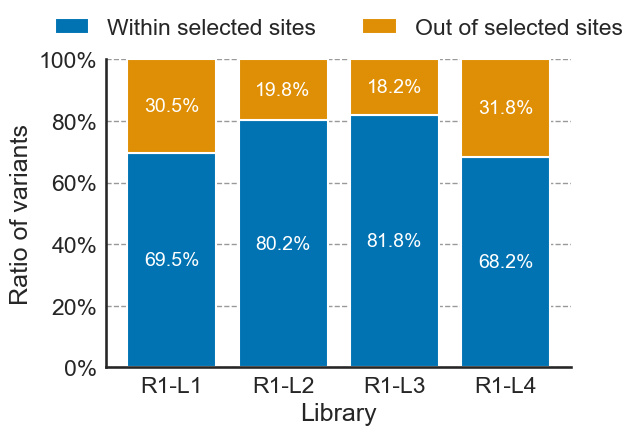

In [7]:
from utils import plot_style_utils
import matplotlib.pyplot as plt
import numpy as np

df_total_counts_selected = df_total_counts[df_total_counts['lib_name'].isin(['R1-L1', 'R1-L2', 'R1-L3', 'R1-L4',])]

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

labels = df_total_counts_selected['lib_name'].values
x = np.arange(len(labels))  # the label locations

all_data = np.array([df_total_counts_selected['in_lib_ratio'].values, df_total_counts_selected['out_lib_ratio'].values])
sums = all_data.sum(axis=0)
bar_labels = ['Within selected sites', 'Out of selected sites',]


bottom_y = np.zeros(len(labels))
for i, (data, b_label) in enumerate(zip(all_data, bar_labels)):
    y = data/sums
    ax.bar(labels, y, label=b_label, color=plot_style_utils.CAT_PALETTE[i], bottom=bottom_y)
    bottom_y += y

for c in ax.containers:
    ax.bar_label(c, label_type='center', labels=[f'{100*x:.1f}%' for x in c.datavalues], color='w', fontsize=14)

ax.grid(True, color='0.6', linestyle='--', linewidth=1)
ax.set_xlabel("Library")
ax.set_ylabel("Ratio of variants")
ax.set_ylim(0, 1.0)
#
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

ax.legend(ncol=3, loc='upper center', frameon=False, handlelength=1.5, bbox_to_anchor=(0.5, 1.2))
plot_style_utils.save_for_pub(fig=fig, path="figures/round1/r1_libs_inlib_barplot")